In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, roc_curve)
import warnings
warnings.filterwarnings('ignore')


# Visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
# Machine Learning
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score,
    confusion_matrix, f1_score,
    precision_score, recall_score
)
import xgboost as xgb
import lightgbm as lgb
import shap


In [ ]:
df = pd.read_excel("/content/Data-Scaled.xlsx")
df.head()

,bankrupt,operating_profit_rate,aftertax_net_interest_rate,nonindustry_income_and_expenditurerevenue,operating_expense_rate,research_and_development_expense_rate,cash_flow_rate,interestbearing_debt_interest_rate,tax_rate_a,net_value_per_share_a,...,liabilityassets_flag,net_income_to_total_assets,total_assets_to_gnp_price,nocredit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,degree_of_financial_leverage_dfl,interest_coverage_ratio_interest_expense_to_ebit,net_income_flag,equity_to_liability
0,1,0.998969,0.808809,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.026601,0.564050,1,0.016469
1,1,0.998946,0.809301,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.047513,0.570175,1,0.020794
2,1,0.998857,0.808388,0.302258,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.026555,0.563706,1,0.016474
3,1,0.998700,0.808966,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.026697,0.564663,1,0.023982
4,1,0.998973,0.809304,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.024752,0.575617,1,0.035490


In [ ]:
list(df.columns)

['bankrupt',
 'operating_profit_rate',
 'aftertax_net_interest_rate',
 'nonindustry_income_and_expenditurerevenue',
 'operating_expense_rate',
 'research_and_development_expense_rate',
 'cash_flow_rate',
 'interestbearing_debt_interest_rate',
 'tax_rate_a',
 'net_value_per_share_a',
 'persistent_eps_in_the_last_four_seasons',
 'cash_flow_per_share',
 'revenue_per_share_yuan_',
 'operating_profit_per_share_yuan_',
 'realized_sales_gross_profit_growth_rate',
 'operating_profit_growth_rate',
 'aftertax_net_profit_growth_rate',
 'continuous_net_profit_growth_rate',
 'total_asset_growth_rate',
 'net_value_growth_rate',
 'total_asset_return_growth_rate_ratio',
 'cash_reinvestment_',
 'current_ratio',
 'interest_expense_ratio',
 'total_debttotal_net_worth',
 'net_worthassets',
 'longterm_fund_suitability_ratio_a',
 'borrowing_dependency',
 'contingent_liabilitiesnet_worth',
 'inventory_and_accounts_receivablenet_value',
 'total_asset_turnover',
 'accounts_receivable_turnover',
 'average_colle

In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"\nTarget distribution:\n{df['bankrupt'].value_counts()}")
print(f"\nClass imbalance ratio: {df['bankrupt'].value_counts()[0]/df['bankrupt'].value_counts()[1]:.2f}:1")

Dataset shape: (1874, 77)

Target distribution:
bankrupt
0    1773
1     101
Name: count, dtype: int64

Class imbalance ratio: 17.55:1


In [ ]:
print("\n" + "="*80)
print("FEATURE INFORMATION")
print("="*80)
print(f"\nFirst 5 feature names:")
for i, col in enumerate(df.columns[1:6], 1):
    print(f"{i}. {col}")


FEATURE INFORMATION

First 5 feature names:
1. operating_profit_rate
2. aftertax_net_interest_rate
3. nonindustry_income_and_expenditurerevenue
4. operating_expense_rate
5. research_and_development_expense_rate


In [ ]:
print(f"\nMissing Values: {df.isnull().sum().sum()}")
print(f"Data Types: {df.dtypes.value_counts().to_dict()}")


Missing Values: 0
Data Types: {dtype('float64'): 74, dtype('int64'): 3}


In [ ]:
# Basic statistics
print("\n" + "="*80)
print("TARGET VARIABLE SUMMARY")
print("="*80)
print(f"Bankrupt Companies: {df['bankrupt'].sum()} ({df['bankrupt'].sum()/len(df)*100:.2f}%)")
print(f"Non-Bankrupt Companies: {(df['bankrupt']==0).sum()} ({(df['bankrupt']==0).sum()/len(df)*100:.2f}%)")


TARGET VARIABLE SUMMARY
Bankrupt Companies: 101 (5.39%)
Non-Bankrupt Companies: 1773 (94.61%)


In [ ]:
# Display first few rows
print("\n" + "="*80)
print("SAMPLE DATA (First 3 Rows)")
print("="*80)
print(df.head(3))


SAMPLE DATA (First 3 Rows)
   bankrupt  operating_profit_rate  aftertax_net_interest_rate  \
0         1               0.998969                    0.808809   
1         1               0.998946                    0.809301   
2         1               0.998857                    0.808388   

   nonindustry_income_and_expenditurerevenue  operating_expense_rate  \
0                                   0.302646                0.000126   
1                                   0.303556                0.000290   
2                                   0.302258                0.000236   

   research_and_development_expense_rate  cash_flow_rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   

   interestbearing_debt_interest_rate  tax_rate_a  net_value_per_share_a  ...  \
0                            0.000725         0.0               0.147950  ...   
1              

In [ ]:
# Separate features and target
X = df.drop('bankrupt', axis=1)
y = df['bankrupt']

print(f"\n✓ Features shape: {X.shape}")
print(f"✓ Target shape: {y.shape}")
print(f"✓ Using pre-scaled features from EDA")

# Train-test split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


✓ Features shape: (1874, 76)
✓ Target shape: (1874,)
✓ Using pre-scaled features from EDA


In [ ]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining set class distribution:\n{y_train.value_counts()}")
print(f"Test set class distribution:\n{y_test.value_counts()}")

Training set: (1499, 76)
Test set: (375, 76)

Training set class distribution:
bankrupt
0    1418
1      81
Name: count, dtype: int64
Test set class distribution:
bankrupt
0    355
1     20
Name: count, dtype: int64


In [ ]:
print(f"\nTraining Set:")
print(f"  - Total samples: {X_train.shape[0]}")
print(f"  - Bankrupt: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.2f}%)")
print(f"  - Non-Bankrupt: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")

print(f"\nTest Set:")
print(f"  - Total samples: {X_test.shape[0]}")
print(f"  - Bankrupt: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.2f}%)")
print(f"  - Non-Bankrupt: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)")



Training Set:
  - Total samples: 1499
  - Bankrupt: 81 (5.40%)
  - Non-Bankrupt: 1418 (94.60%)

Test Set:
  - Total samples: 375
  - Bankrupt: 20 (5.33%)
  - Non-Bankrupt: 355 (94.67%)


MODEL TRAINING & COMPARISON

Training models on pre-scaled data...

Training Logistic Regression... ✓ (ROC-AUC: 0.6445, F1: 0.0000)
Training Decision Tree... ✓ (ROC-AUC: 0.6345, F1: 0.3243)
Training Random Forest... ✓ (ROC-AUC: 0.9372, F1: 0.3704)
Training XGBoost... ✓ (ROC-AUC: 0.9145, F1: 0.4444)
Training LightGBM... ✓ (ROC-AUC: 0.9544, F1: 0.4828)

MODEL COMPARISON RESULTS (Sorted by ROC-AUC)
              Model  ROC-AUC  F1-Score  Precision  Recall  Avg Precision
           LightGBM 0.954366  0.482759   0.777778    0.35       0.609357
      Random Forest 0.937183  0.370370   0.714286    0.25       0.586486
            XGBoost 0.914507  0.444444   0.857143    0.30       0.556675
Logistic Regression 0.644507  0.000000   0.000000    0.00       0.082045
      Decision Tree 0.634507  0.324324   0.352941    0.30       0.143216


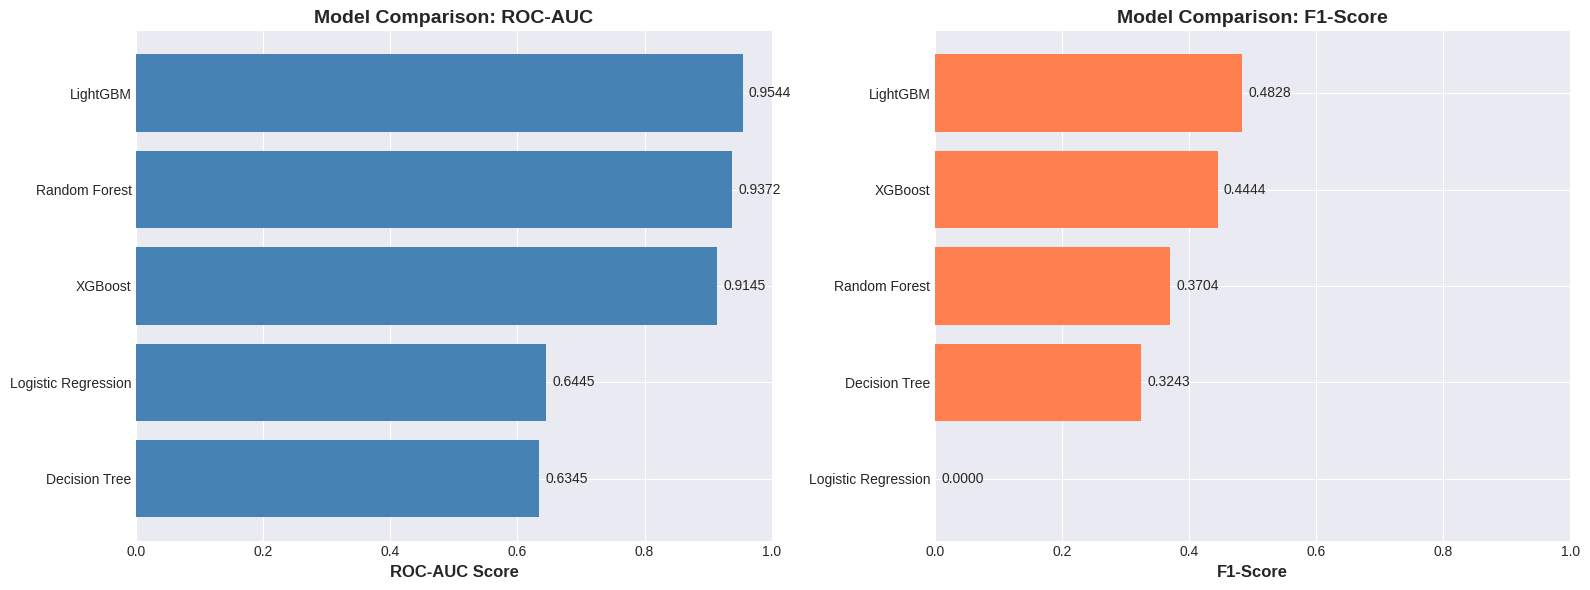


✓ Model comparison visualization saved: model_comparison.png


In [ ]:
# Build and compare multiple models (using pre-scaled data)
print("="*80)
print("MODEL TRAINING & COMPARISON")
print("="*80)

# Define models to compare
# All models will use the SAME pre-scaled data
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss', n_jobs=-1),
    'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42, verbose=-1, n_jobs=-1),

}

# Train and evaluate each model
results = []
trained_models = {}

print("\nTraining models on pre-scaled data...\n")

for name, model in models.items():
    print(f"Training {name}...", end=" ")

    # Train model (using pre-scaled data)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    metrics = {
        'Model': name,
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'F1-Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Avg Precision': average_precision_score(y_test, y_pred_proba)
    }

    results.append(metrics)
    trained_models[name] = model

    print(f"✓ (ROC-AUC: {metrics['ROC-AUC']:.4f}, F1: {metrics['F1-Score']:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results).sort_values('ROC-AUC', ascending=False)

print("\n" + "="*80)
print("MODEL COMPARISON RESULTS (Sorted by ROC-AUC)")
print("="*80)
print(results_df.to_string(index=False))

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC-AUC comparison
ax1 = axes[0]
results_df_sorted = results_df.sort_values('ROC-AUC')
bars1 = ax1.barh(results_df_sorted['Model'], results_df_sorted['ROC-AUC'], color='steelblue')
ax1.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Comparison: ROC-AUC', fontsize=14, fontweight='bold')
ax1.set_xlim(0, 1)
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center', fontsize=10)

# F1-Score comparison
ax2 = axes[1]
results_df_sorted_f1 = results_df.sort_values('F1-Score')
bars2 = ax2.barh(results_df_sorted_f1['Model'], results_df_sorted_f1['F1-Score'], color='coral')
ax2.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax2.set_title('Model Comparison: F1-Score', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 1)
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Model comparison visualization saved: model_comparison.png")

In [ ]:
# Cross-validation for robust evaluation (using pre-scaled data)
print("="*80)
print("CROSS-VALIDATION ANALYSIS")
print("="*80)

# Perform 5-fold stratified cross-validation on top 4 models
top_models = results_df.head(4)['Model'].tolist()
cv_results = []

print("\nPerforming 5-fold cross-validation on pre-scaled data...\n")

for model_name in top_models:
    print(f"Cross-validating {model_name}...", end=" ")

    model = models[model_name]

    # Stratified K-Fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validation with multiple metrics (using entire pre-scaled dataset)
    cv_scores = cross_validate(
        model, X, y,
        cv=skf,
        scoring=['roc_auc', 'f1', 'precision', 'recall'],
        n_jobs=-1
    )

    cv_results.append({
        'Model': model_name,
        'ROC-AUC (mean)': cv_scores['test_roc_auc'].mean(),
        'ROC-AUC (std)': cv_scores['test_roc_auc'].std(),
        'F1 (mean)': cv_scores['test_f1'].mean(),
        'F1 (std)': cv_scores['test_f1'].std(),
        'Precision (mean)': cv_scores['test_precision'].mean(),
        'Recall (mean)': cv_scores['test_recall'].mean()
    })

    print(f"✓ (ROC-AUC: {cv_scores['test_roc_auc'].mean():.4f} ± {cv_scores['test_roc_auc'].std():.4f})")

cv_results_df = pd.DataFrame(cv_results).sort_values('ROC-AUC (mean)', ascending=False)

print("\n" + "="*80)
print("CROSS-VALIDATION RESULTS (5-Fold Stratified)")
print("="*80)
print(cv_results_df.to_string(index=False))

print("\n✓ Cross-validation completed")

CROSS-VALIDATION ANALYSIS

Performing 5-fold cross-validation on pre-scaled data...

Cross-validating LightGBM... ✓ (ROC-AUC: 0.9330 ± 0.0471)
Cross-validating Random Forest... ✓ (ROC-AUC: 0.9200 ± 0.0388)
Cross-validating XGBoost... ✓ (ROC-AUC: 0.9247 ± 0.0353)
Cross-validating Logistic Regression... ✓ (ROC-AUC: 0.6102 ± 0.0239)

CROSS-VALIDATION RESULTS (5-Fold Stratified)
              Model  ROC-AUC (mean)  ROC-AUC (std)  F1 (mean)  F1 (std)  Precision (mean)  Recall (mean)
           LightGBM        0.932966       0.047115   0.433807  0.049473          0.654603       0.327143
            XGBoost        0.924726       0.035283   0.502867  0.090424          0.649448       0.416190
      Random Forest        0.920021       0.038838   0.362142  0.115620          0.648312       0.257619
Logistic Regression        0.610242       0.023928   0.018182  0.036364          0.100000       0.010000

✓ Cross-validation completed


In [ ]:
test_set = X_test.copy()
test_set['actual_bankrupt'] = y_test
test_set['Predicted_Bankrupt'] = y_pred
test_set.to_excel('test_set.xlsx', index=False)

BEST MODEL: LightGBM

Confusion Matrix:
                 Predicted
                 Non-Bankrupt  Bankrupt
Actual Non-Bankrupt     353           2
Actual Bankrupt          13           7

Detailed Metrics:
  True Negatives:   353
  False Positives:    2
  False Negatives:   13
  True Positives:     7

  Accuracy:  0.9600
  Precision: 0.7778
  Recall:    0.3500
  F1-Score:  0.4828
  ROC-AUC:   0.9544


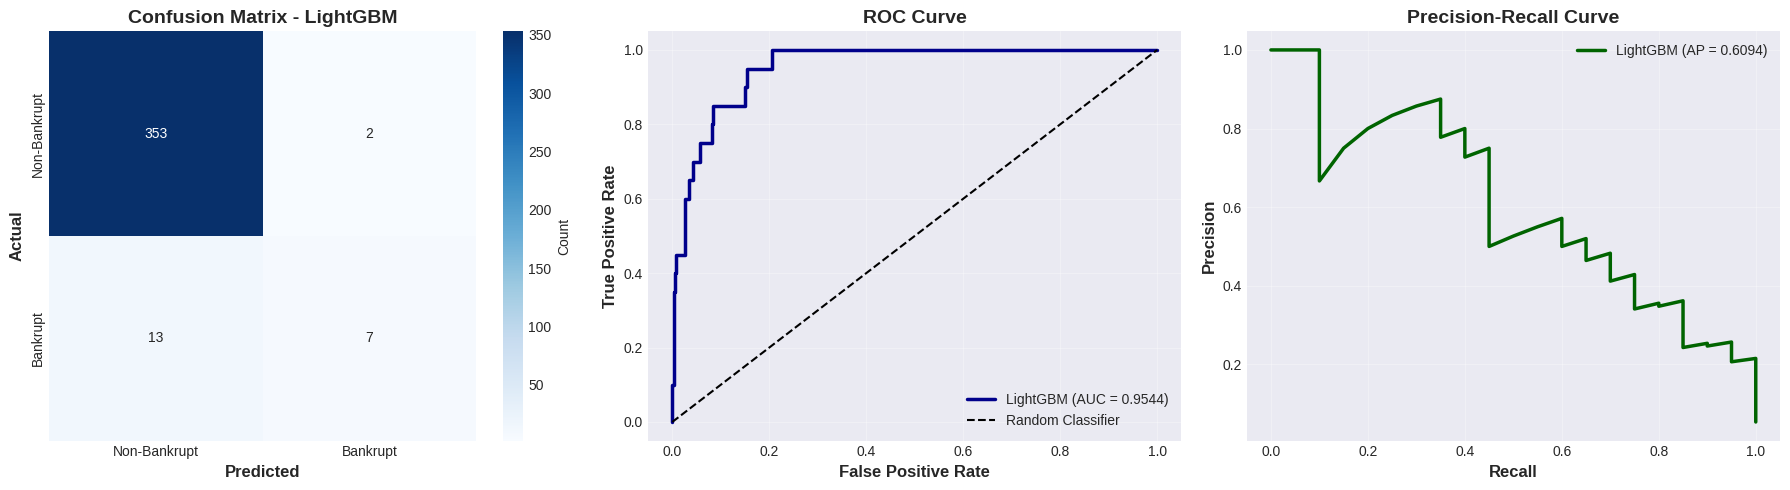


✓ Best model evaluation plots saved: best_model_evaluation.png


In [ ]:
# Select best model and detailed evaluation
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]

print("="*80)
print(f"BEST MODEL: {best_model_name}")
print("="*80)

# Get predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                 Non-Bankrupt  Bankrupt")
print(f"Actual Non-Bankrupt    {cm[0,0]:4d}        {cm[0,1]:4d}")
print(f"Actual Bankrupt        {cm[1,0]:4d}        {cm[1,1]:4d}")

print("\nDetailed Metrics:")
print(f"  True Negatives:  {cm[0,0]:4d}")
print(f"  False Positives: {cm[0,1]:4d}")
print(f"  False Negatives: {cm[1,0]:4d}")
print(f"  True Positives:  {cm[1,1]:4d}")

print(f"\n  Accuracy:  {(cm[0,0] + cm[1,1]) / cm.sum():.4f}")
print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")

# Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
ax1 = axes[0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Non-Bankrupt', 'Bankrupt'],
            yticklabels=['Non-Bankrupt', 'Bankrupt'],
            cbar_kws={'label': 'Count'})
ax1.set_ylabel('Actual', fontsize=12, fontweight='bold')
ax1.set_xlabel('Predicted', fontsize=12, fontweight='bold')
ax1.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')

# 2. ROC Curve
ax2 = axes[1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
ax2.plot(fpr, tpr, label=f'{best_model_name} (AUC = {auc_score:.4f})', linewidth=2.5, color='darkblue')
ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1.5)
ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Precision-Recall Curve
ax3 = axes[2]
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
ap_score = average_precision_score(y_test, y_pred_proba)
ax3.plot(recall_vals, precision_vals, label=f'{best_model_name} (AP = {ap_score:.4f})',
         linewidth=2.5, color='darkgreen')
ax3.set_xlabel('Recall', fontsize=12, fontweight='bold')
ax3.set_ylabel('Precision', fontsize=12, fontweight='bold')
ax3.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('best_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Best model evaluation plots saved: best_model_evaluation.png")

SHAP ANALYSIS: GLOBAL FEATURE IMPORTANCE

Initializing SHAP explainer... ✓ (Shape: (375, 76))

TOP 20 MOST IMPORTANT FEATURES
 1. total_debttotal_net_worth                          | SHAP: 0.683022
 2. retained_earnings_to_total_assets                  | SHAP: 0.605784
 3. borrowing_dependency                               | SHAP: 0.306286
 4. revenue_per_person                                 | SHAP: 0.266600
 5. cash_flow_to_sales                                 | SHAP: 0.264375
 6. cashtotal_assets                                   | SHAP: 0.246221
 7. interestbearing_debt_interest_rate                 | SHAP: 0.235951
 8. nonindustry_income_and_expenditurerevenue          | SHAP: 0.228406
 9. revenue_per_share_yuan_                            | SHAP: 0.180795
10. total_incometotal_expense                          | SHAP: 0.159153
11. total_assets_to_gnp_price                          | SHAP: 0.155546
12. fixed_assets_turnover_frequency                    | SHAP: 0.154088
13. cash_t

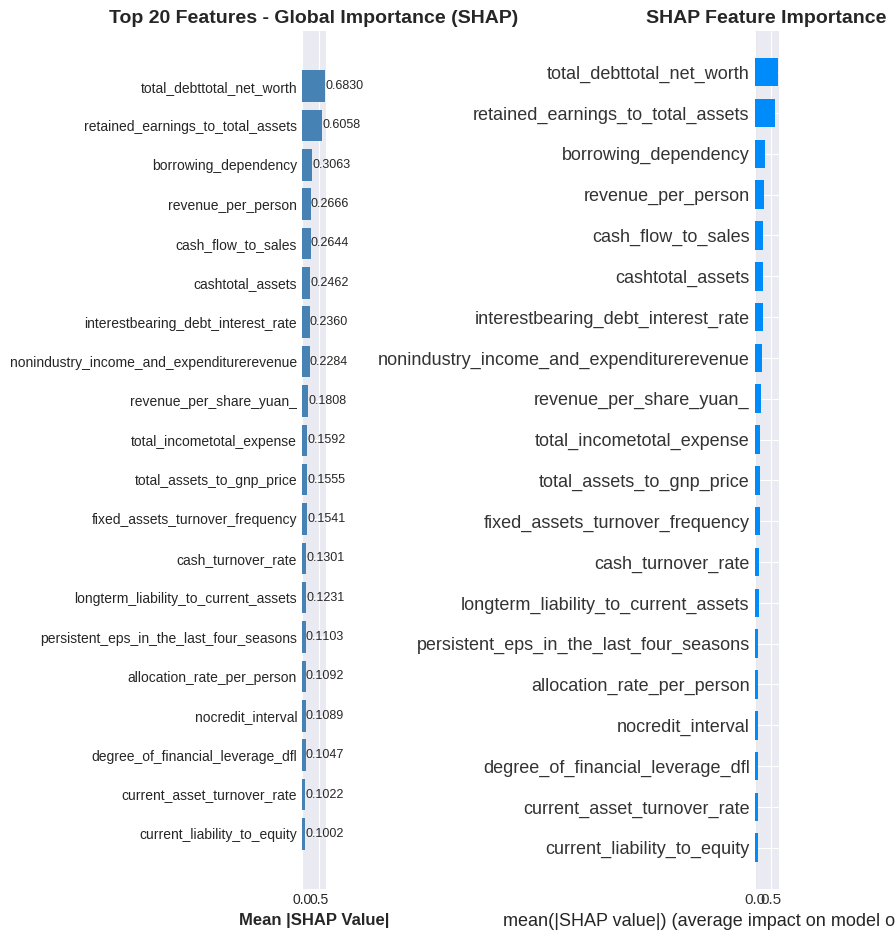


✓ Global importance plots saved: shap_global_importance.png


In [ ]:
# SHAP Analysis - Global Feature Importance
print("="*80)
print("SHAP ANALYSIS: GLOBAL FEATURE IMPORTANCE")
print("="*80)

print("\nInitializing SHAP explainer...", end=" ")

# Create SHAP explainer for tree-based model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Handle different SHAP output formats
if isinstance(shap_values, list):
    shap_values = shap_values[1]  # For binary classification, use positive class

print(f"✓ (Shape: {shap_values.shape})")

# Calculate global feature importance
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean_Absolute_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values('Mean_Absolute_SHAP', ascending=False)

print("\n" + "="*80)
print("TOP 20 MOST IMPORTANT FEATURES")
print("="*80)
for idx, row in enumerate(feature_importance.head(20).itertuples(), 1):
    print(f"{idx:2d}. {row.Feature:50s} | SHAP: {row.Mean_Absolute_SHAP:.6f}")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Bar plot - Top 20 features
ax1 = axes[0]
top_20 = feature_importance.head(20).sort_values('Mean_Absolute_SHAP')
bars = ax1.barh(top_20['Feature'], top_20['Mean_Absolute_SHAP'], color='steelblue')
ax1.set_xlabel('Mean |SHAP Value|', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 Features - Global Importance (SHAP)', fontsize=14, fontweight='bold')
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center', fontsize=9)

# 2. SHAP summary plot (using matplotlib backend)
ax2 = axes[1]
plt.sca(ax2)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False, max_display=20)
ax2.set_title('SHAP Feature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('shap_global_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Global importance plots saved: shap_global_importance.png")

In [ ]:
print("="*80)
print("SHAP SUMMARY PLOT: FEATURE RANKING")
print("="*80)

# Get the feature names as a list
ranked_features_list = feature_importance['Feature'].tolist()

print("\nRanked Features (from most to least important):\n")
for idx, feature in enumerate(ranked_features_list, 1):
    print(f" {idx}. {feature}")

SHAP SUMMARY PLOT: FEATURE RANKING

Ranked Features (from most to least important):

 1. total_debttotal_net_worth
 2. retained_earnings_to_total_assets
 3. borrowing_dependency
 4. revenue_per_person
 5. cash_flow_to_sales
 6. cashtotal_assets
 7. interestbearing_debt_interest_rate
 8. nonindustry_income_and_expenditurerevenue
 9. revenue_per_share_yuan_
 10. total_incometotal_expense
 11. total_assets_to_gnp_price
 12. fixed_assets_turnover_frequency
 13. cash_turnover_rate
 14. longterm_liability_to_current_assets
 15. persistent_eps_in_the_last_four_seasons
 16. allocation_rate_per_person
 17. nocredit_interval
 18. degree_of_financial_leverage_dfl
 19. current_asset_turnover_rate
 20. current_liability_to_equity
 21. inventoryworking_capital
 22. net_value_per_share_a
 23. accounts_receivable_turnover
 24. quick_asset_turnover_rate
 25. average_collection_days
 26. cash_flow_rate
 27. working_capitalequity
 28. total_asset_growth_rate
 29. cash_flow_to_liability
 30. inventorycurr

SHAP BEESWARM PLOT: FEATURE IMPACT & DIRECTION


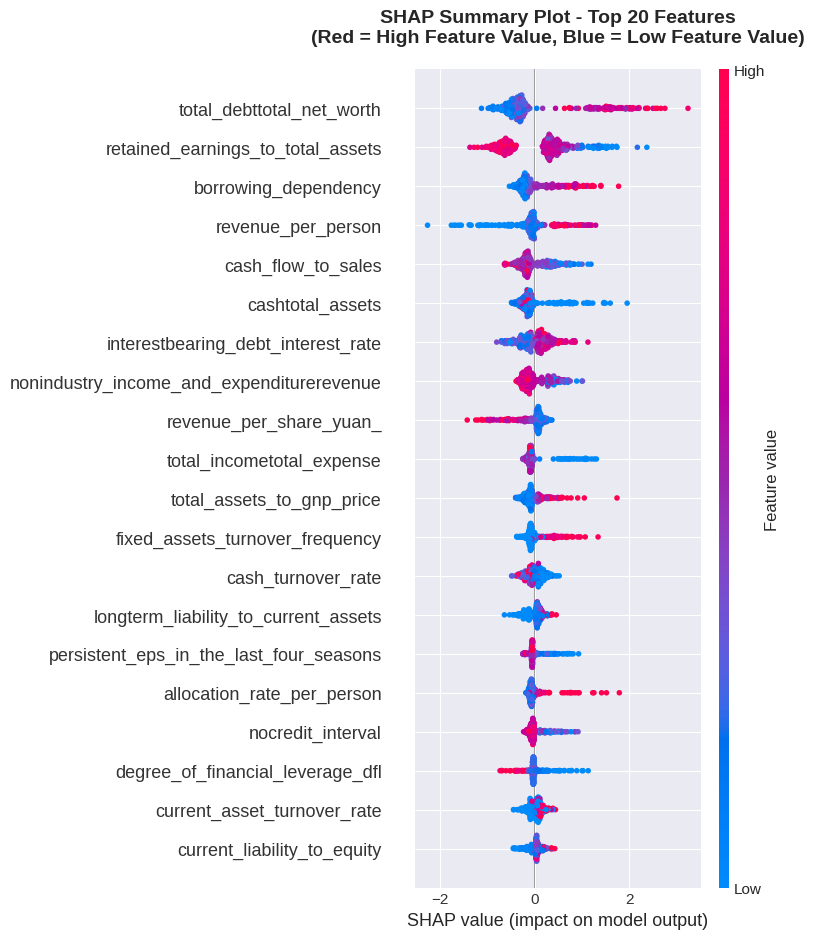


✓ Beeswarm plot saved: shap_beeswarm.png

How to interpret the beeswarm plot:
  • Features are ranked by importance (top to bottom)
  • X-axis shows SHAP value (impact on model prediction)
  • Each dot represents one observation
  • Red dots = High feature value
  • Blue dots = Low feature value
  • Positive SHAP = Increases bankruptcy risk
  • Negative SHAP = Decreases bankruptcy risk


In [ ]:
# SHAP Summary Plot (Beeswarm) - Shows feature values and impact direction
print("="*80)
print("SHAP BEESWARM PLOT: FEATURE IMPACT & DIRECTION")
print("="*80)

plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, show=False, max_display=20)
plt.title('SHAP Summary Plot - Top 20 Features\n(Red = High Feature Value, Blue = Low Feature Value)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('shap_beeswarm.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Beeswarm plot saved: shap_beeswarm.png")

print("\nHow to interpret the beeswarm plot:")
print("  • Features are ranked by importance (top to bottom)")
print("  • X-axis shows SHAP value (impact on model prediction)")
print("  • Each dot represents one observation")
print("  • Red dots = High feature value")
print("  • Blue dots = Low feature value")
print("  • Positive SHAP = Increases bankruptcy risk")
print("  • Negative SHAP = Decreases bankruptcy risk")

SHAP ANALYSIS: INDIVIDUAL PREDICTION EXPLANATIONS

Example 1: Bankrupt Company (Index 11)
  Actual: Bankrupt
  Predicted: Non-Bankrupt
  Probability: 0.0001


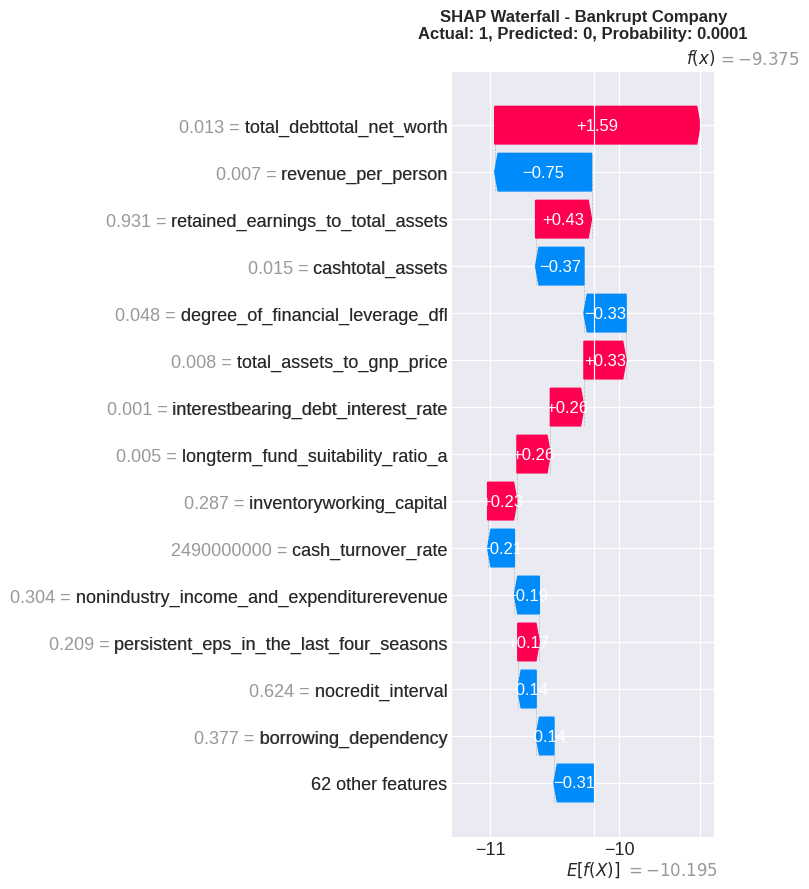

  ✓ Waterfall plot saved: shap_waterfall_bankrupt.png

Example 2: Non-Bankrupt Company (Index 0)
  Actual: Non-Bankrupt
  Predicted: Non-Bankrupt
  Probability: 0.0000


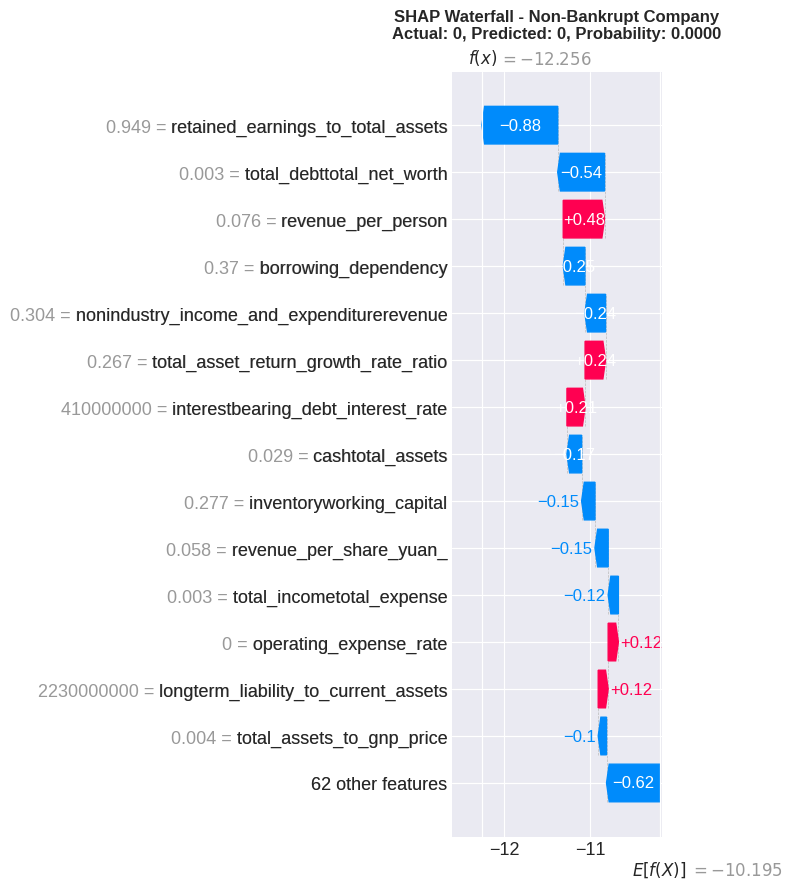

  ✓ Waterfall plot saved: shap_waterfall_non_bankrupt.png

Waterfall plot interpretation:
  • Base value (E[f(X)]): Average model prediction
  • Red bars: Features pushing prediction higher (toward bankrupt)
  • Blue bars: Features pushing prediction lower (toward non-bankrupt)
  • Final value (f(x)): Actual prediction for this instance


In [ ]:
# Individual Prediction Explanations
print("="*80)
print("SHAP ANALYSIS: INDIVIDUAL PREDICTION EXPLANATIONS")
print("="*80)

# Example 1: Explain a bankrupt company prediction
bankrupt_indices = np.where(y_test == 1)[0]
if len(bankrupt_indices) > 0:
    idx = bankrupt_indices[0]

    print(f"\nExample 1: Bankrupt Company (Index {idx})")
    print(f"  Actual: Bankrupt")
    print(f"  Predicted: {'Bankrupt' if y_pred[idx] == 1 else 'Non-Bankrupt'}")
    print(f"  Probability: {y_pred_proba[idx]:.4f}")

    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[idx],
            base_values=explainer.expected_value,
            data=X_test.iloc[idx],
            feature_names=X_test.columns.tolist()
        ),
        show=False,
        max_display=15
    )
    plt.title(f'SHAP Waterfall - Bankrupt Company\nActual: {y_test.iloc[idx]}, Predicted: {y_pred[idx]}, Probability: {y_pred_proba[idx]:.4f}',
              fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig('shap_waterfall_bankrupt.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✓ Waterfall plot saved: shap_waterfall_bankrupt.png")

# Example 2: Explain a non-bankrupt company prediction
non_bankrupt_indices = np.where(y_test == 0)[0]
if len(non_bankrupt_indices) > 0:
    idx = non_bankrupt_indices[0]

    print(f"\nExample 2: Non-Bankrupt Company (Index {idx})")
    print(f"  Actual: Non-Bankrupt")
    print(f"  Predicted: {'Bankrupt' if y_pred[idx] == 1 else 'Non-Bankrupt'}")
    print(f"  Probability: {y_pred_proba[idx]:.4f}")

    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[idx],
            base_values=explainer.expected_value,
            data=X_test.iloc[idx],
            feature_names=X_test.columns.tolist()
        ),
        show=False,
        max_display=15
    )
    plt.title(f'SHAP Waterfall - Non-Bankrupt Company\nActual: {y_test.iloc[idx]}, Predicted: {y_pred[idx]}, Probability: {y_pred_proba[idx]:.4f}',
              fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.savefig('shap_waterfall_non_bankrupt.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("  ✓ Waterfall plot saved: shap_waterfall_non_bankrupt.png")

print("\nWaterfall plot interpretation:")
print("  • Base value (E[f(X)]): Average model prediction")
print("  • Red bars: Features pushing prediction higher (toward bankrupt)")
print("  • Blue bars: Features pushing prediction lower (toward non-bankrupt)")
print("  • Final value (f(x)): Actual prediction for this instance")

SHAP DEPENDENCE PLOTS: TOP 5 FEATURES

Creating dependence plots for top 5 features...

1. total_debttotal_net_worth
2. retained_earnings_to_total_assets
3. borrowing_dependency
4. revenue_per_person
5. cash_flow_to_sales


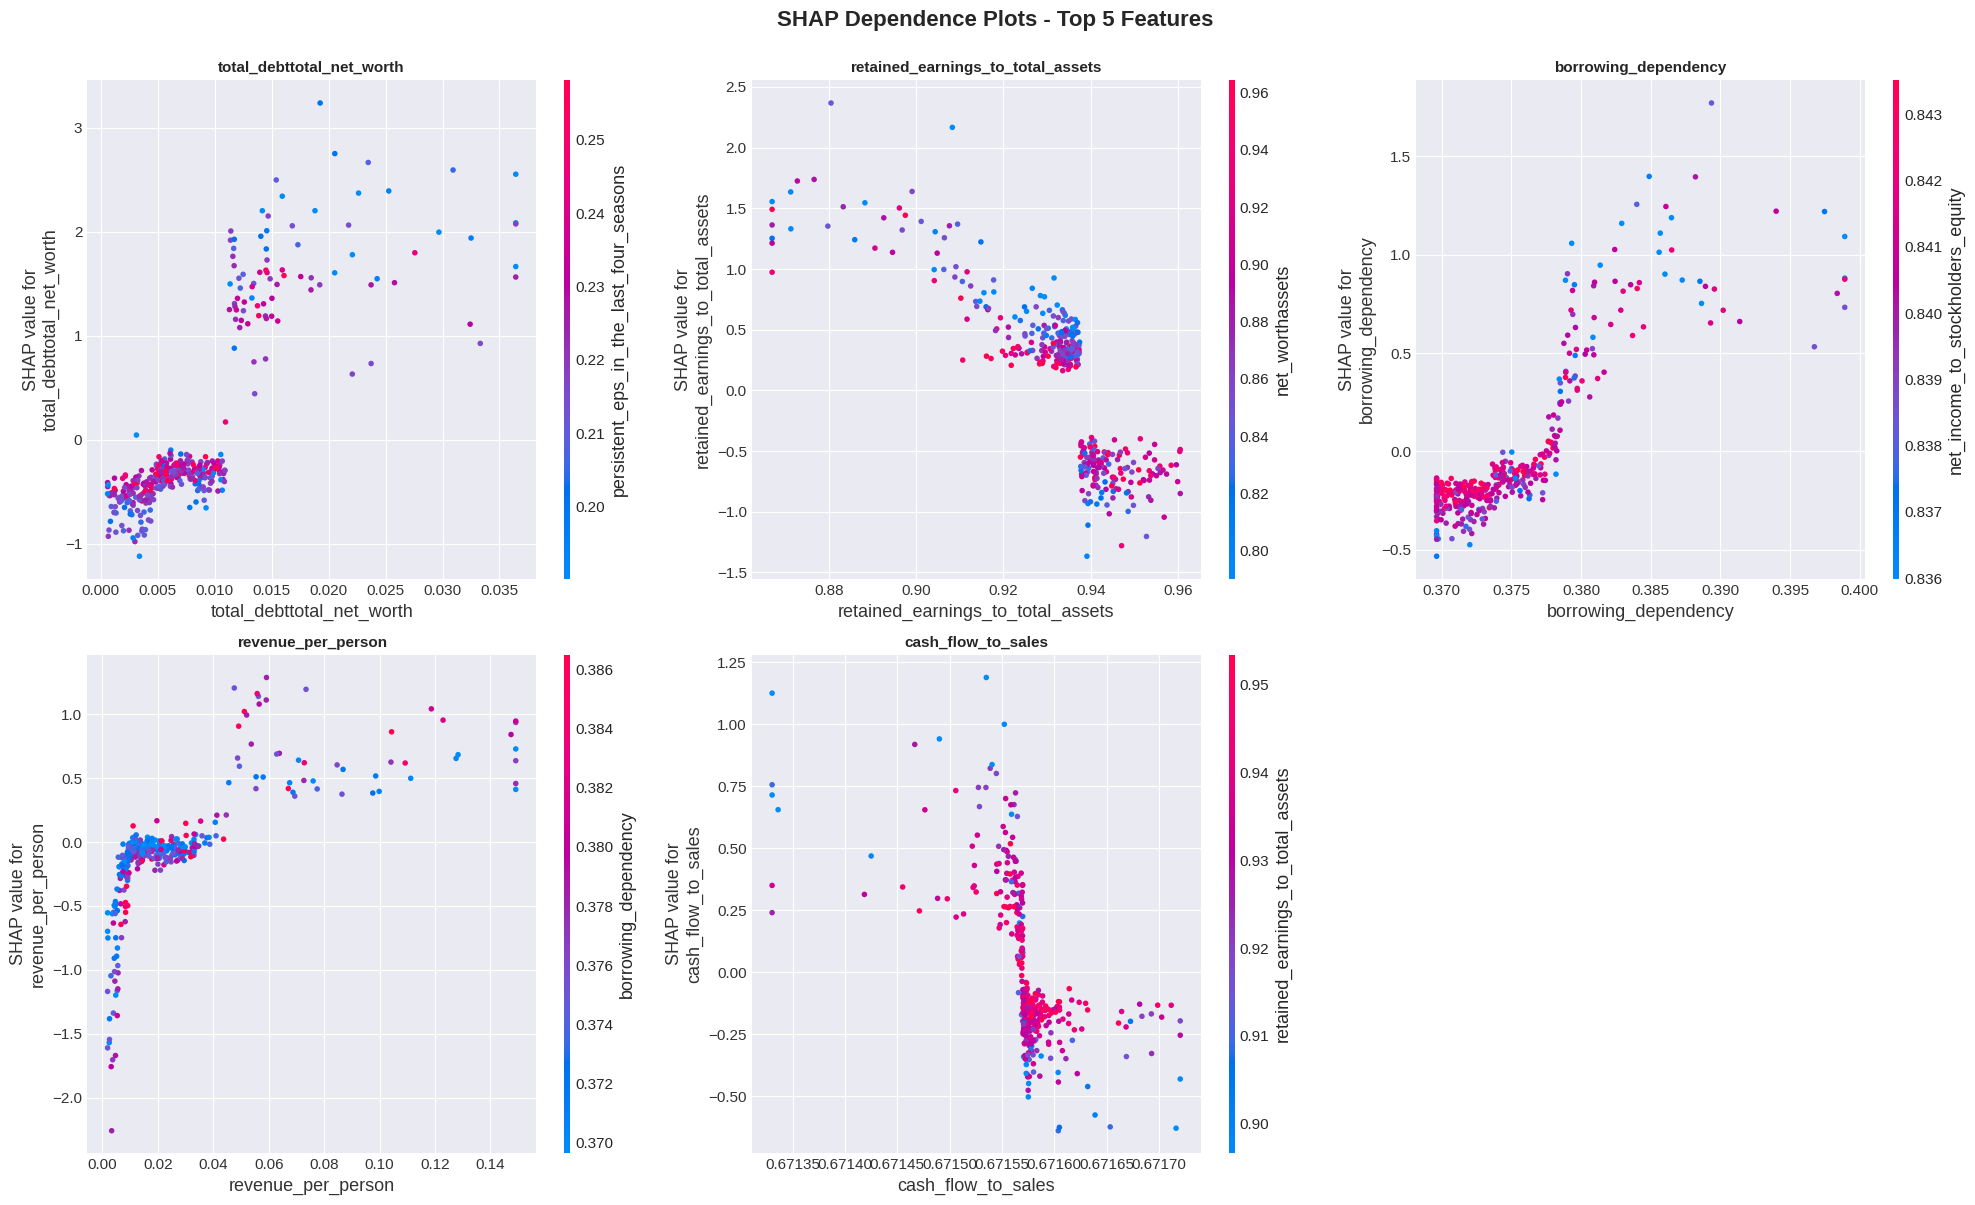


✓ Dependence plots saved: shap_dependence_plots.png

Dependence plot interpretation:
  • X-axis: Feature value
  • Y-axis: SHAP value (impact on prediction)
  • Color: Value of most important interacting feature
  • Shows how feature value affects bankruptcy risk
  • Can reveal non-linear relationships and interactions


In [ ]:
# SHAP Dependence Plots - Top 5 Features
print("="*80)
print("SHAP DEPENDENCE PLOTS: TOP 5 FEATURES")
print("="*80)

print("\nCreating dependence plots for top 5 features...\n")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i in range(min(5, len(feature_importance))):
    feature = feature_importance.iloc[i]['Feature']

    print(f"{i+1}. {feature}")

    plt.sca(axes[i])
    shap.dependence_plot(
        feature,
        shap_values,
        X_test,
        show=False,
        ax=axes[i]
    )
    axes[i].set_title(f'{feature[:50]}', fontsize=11, fontweight='bold')

# Remove extra subplot
if len(axes) > 5:
    fig.delaxes(axes[5])

plt.suptitle('SHAP Dependence Plots - Top 5 Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('shap_dependence_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Dependence plots saved: shap_dependence_plots.png")

print("\nDependence plot interpretation:")
print("  • X-axis: Feature value")
print("  • Y-axis: SHAP value (impact on prediction)")
print("  • Color: Value of most important interacting feature")
print("  • Shows how feature value affects bankruptcy risk")
print("  • Can reveal non-linear relationships and interactions")

CLASS-SPECIFIC SHAP ANALYSIS

Bankrupt companies in test set: 20
Non-bankrupt companies in test set: 355

TOP 15 FEATURES WITH BIGGEST DIFFERENCE BETWEEN CLASSES

Feature                                            Bankrupt    Non-Bankrupt  Difference
------------------------------------------------------------------------------------------
total_debttotal_net_worth                            1.349763   -0.048447    1.398210
retained_earnings_to_total_assets                    1.122300    0.021436    1.100865
borrowing_dependency                                 0.737189   -0.039077    0.776265
persistent_eps_in_the_last_four_seasons              0.407868   -0.028441    0.436310
total_incometotal_expense                            0.375089   -0.045790    0.420879
working_capitalequity                                0.346634   -0.028793    0.375427
nonindustry_income_and_expenditurerevenue            0.312467   -0.016098    0.328565
net_value_per_share_a                                0.3

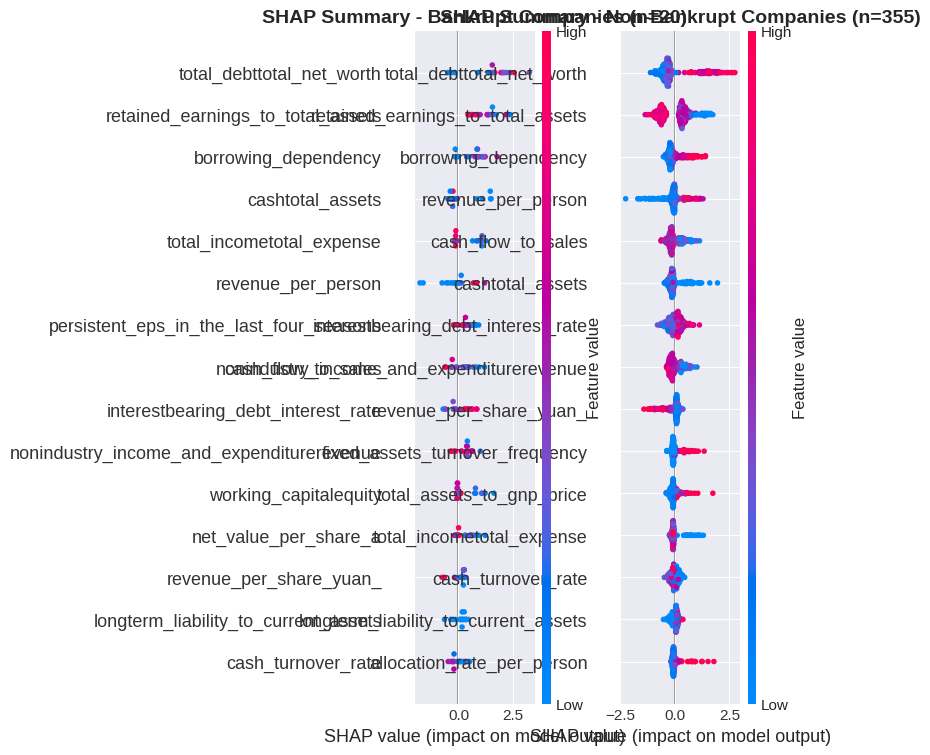


✓ Class comparison plots saved: shap_class_comparison.png


In [ ]:
# Class-Specific SHAP Analysis
print("="*80)
print("CLASS-SPECIFIC SHAP ANALYSIS")
print("="*80)

# Separate by class
bankrupt_mask = y_test == 1
non_bankrupt_mask = y_test == 0

print(f"\nBankrupt companies in test set: {bankrupt_mask.sum()}")
print(f"Non-bankrupt companies in test set: {non_bankrupt_mask.sum()}")

# Calculate mean SHAP values by class
bankrupt_shap_mean = shap_values[bankrupt_mask].mean(axis=0)
non_bankrupt_shap_mean = shap_values[non_bankrupt_mask].mean(axis=0)
shap_difference = bankrupt_shap_mean - non_bankrupt_shap_mean

# Create comparison DataFrame
class_comparison = pd.DataFrame({
    'Feature': X_test.columns,
    'Bankrupt_Mean_SHAP': bankrupt_shap_mean,
    'Non_Bankrupt_Mean_SHAP': non_bankrupt_shap_mean,
    'Difference': shap_difference,
    'Abs_Difference': np.abs(shap_difference)
}).sort_values('Abs_Difference', ascending=False)

print("\n" + "="*80)
print("TOP 15 FEATURES WITH BIGGEST DIFFERENCE BETWEEN CLASSES")
print("="*80)
print("\nFeature                                            Bankrupt    Non-Bankrupt  Difference")
print("-" * 90)
for idx, row in enumerate(class_comparison.head(15).itertuples(), 1):
    print(f"{row.Feature:50s} {row.Bankrupt_Mean_SHAP:10.6f}  {row.Non_Bankrupt_Mean_SHAP:10.6f}  {row.Difference:10.6f}")

# Visualize class comparison
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Summary plot for bankrupt companies
plt.sca(axes[0])
shap.summary_plot(
    shap_values[bankrupt_mask],
    X_test[bankrupt_mask],
    show=False,
    max_display=15
)
axes[0].set_title(f'SHAP Summary - Bankrupt Companies (n={bankrupt_mask.sum()})',
                  fontsize=14, fontweight='bold')

# Plot 2: Summary plot for non-bankrupt companies
plt.sca(axes[1])
shap.summary_plot(
    shap_values[non_bankrupt_mask],
    X_test[non_bankrupt_mask],
    show=False,
    max_display=15
)
axes[1].set_title(f'SHAP Summary - Non-Bankrupt Companies (n={non_bankrupt_mask.sum()})',
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('shap_class_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Class comparison plots saved: shap_class_comparison.png")

In [ ]:
# Comprehensive Report Generation
print("="*80)
print("GENERATING COMPREHENSIVE ANALYSIS REPORT")
print("="*80)

# Create Excel report with all results
with pd.ExcelWriter('bankruptcy_prediction_report.xlsx', engine='openpyxl') as writer:

    # Sheet 1: Model Comparison
    results_df.to_excel(writer, sheet_name='Model Comparison', index=False)

    # Sheet 2: Cross-Validation
    cv_results_df.to_excel(writer, sheet_name='Cross-Validation', index=False)

    # Sheet 3: Feature Importance (SHAP)
    feature_importance.to_excel(writer, sheet_name='Feature Importance', index=False)

    # Sheet 4: Class Comparison
    class_comparison.to_excel(writer, sheet_name='Class Comparison', index=False)

    # Sheet 5: Best Model Details
    best_model_summary = pd.DataFrame({
        'Metric': ['Model Name', 'ROC-AUC', 'F1-Score', 'Precision', 'Recall',
                   'Average Precision', 'True Positives', 'True Negatives',
                   'False Positives', 'False Negatives'],
        'Value': [
            best_model_name,
            f"{roc_auc_score(y_test, y_pred_proba):.4f}",
            f"{f1_score(y_test, y_pred):.4f}",
            f"{precision_score(y_test, y_pred):.4f}",
            f"{recall_score(y_test, y_pred):.4f}",
            f"{average_precision_score(y_test, y_pred_proba):.4f}",
            cm[1,1],
            cm[0,0],
            cm[0,1],
            cm[1,0]
        ]
    })
    best_model_summary.to_excel(writer, sheet_name='Best Model Summary', index=False)

print("\n✓ Excel report saved: bankruptcy_prediction_report.xlsx")

# Save SHAP values
np.save('SHAP.npy', shap_values)
print("✓ SHAP values saved: shap_values.npy")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)

print(f"\n📊 Best Model: {best_model_name}")
print(f"   ROC-AUC:   {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"   F1-Score:  {f1_score(y_test, y_pred):.4f}")
print(f"   Precision: {precision_score(y_test, y_pred):.4f}")
print(f"   Recall:    {recall_score(y_test, y_pred):.4f}")

print("\n📈 Top 5 Most Important Features (SHAP):")
for idx, row in enumerate(feature_importance.head(5).itertuples(), 1):
    print(f"   {idx}. {row.Feature}")

print("\n💾 Generated Files:")
print("   📊 model_comparison.png")
print("   📊 best_model_evaluation.png")
print("   📊 shap_global_importance.png")
print("   📊 shap_beeswarm.png")
print("   📊 shap_waterfall_bankrupt.png")
print("   📊 shap_waterfall_non_bankrupt.png")
print("   📊 shap_dependence_plots.png")
print("   📊 shap_class_comparison.png")
print("   📑 bankruptcy_prediction_report.xlsx")
print("   💾 shap_values.npy")

print("\n" + "="*80)
print("NOTE: All models trained on PRE-SCALED data from EDA")
print("No additional scaling was applied during this analysis")
print("="*80)

GENERATING COMPREHENSIVE ANALYSIS REPORT

✓ Excel report saved: bankruptcy_prediction_report.xlsx
✓ SHAP values saved: shap_values.npy

ANALYSIS COMPLETE!

📊 Best Model: LightGBM
   ROC-AUC:   0.9544
   F1-Score:  0.4828
   Precision: 0.7778
   Recall:    0.3500

📈 Top 5 Most Important Features (SHAP):
   1. total_debttotal_net_worth
   2. retained_earnings_to_total_assets
   3. borrowing_dependency
   4. revenue_per_person
   5. cash_flow_to_sales

💾 Generated Files:
   📊 model_comparison.png
   📊 best_model_evaluation.png
   📊 shap_global_importance.png
   📊 shap_beeswarm.png
   📊 shap_waterfall_bankrupt.png
   📊 shap_waterfall_non_bankrupt.png
   📊 shap_dependence_plots.png
   📊 shap_class_comparison.png
   📑 bankruptcy_prediction_report.xlsx
   💾 shap_values.npy

NOTE: All models trained on PRE-SCALED data from EDA
No additional scaling was applied during this analysis


In [ ]:
#read .npy file
import numpy as np

# Load the .npy file
loaded_array = np.load('shap_values.npy')
print(loaded_array)

[[ 1.28946525e-02 -1.74468957e-02 -2.39228138e-01 ... -7.72071578e-03
   0.00000000e+00  5.43105085e-06]
 [-2.52303123e-02 -2.79902125e-02  5.52486532e-01 ... -7.14170276e-02
   0.00000000e+00  2.81746097e-06]
 [-1.39707691e-02 -1.09920186e-02  6.28177673e-01 ...  2.37427059e-01
   0.00000000e+00  2.81746097e-06]
 ...
 [ 1.86967013e-02 -1.75931900e-02 -8.62079390e-02 ... -1.03305481e-02
   0.00000000e+00  5.43105085e-06]
 [ 1.08144365e-02 -1.46750089e-02 -1.34768951e-01 ... -5.88170905e-03
   0.00000000e+00  2.81746097e-06]
 [-9.51254870e-03 -2.06294840e-02 -2.44766229e-01 ... -1.72958043e-02
   0.00000000e+00 -3.92863610e-05]]
